An Investigation of Imputation Methods
------------------------------------

~Some introduction to what imputation is~

### Data loading

In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

In [2]:
import sys
import warnings

def enforceTypesTitanic(df):
    try:
        df.Survived = df.Survived.astype("category")
    except:
        warnings.warn("No 'Survived' column, make sure this is the train set", Warning)
    df.Pclass = df.Pclass.astype("category", categories=[1, 2, 3], ordered=True)
    df.Sex = df.Sex.astype("category")
    df.Embarked = df.Embarked.astype("category")
    

enforceTypesTitanic(train)
enforceTypesTitanic(test)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: Warning: No 'Survived' column, make sure this is the train set
  


In [3]:
def naSummary(df):
    return df.isnull().sum()

naSummary(train)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
naSummary(test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Verifying Training and Test Sets Similar Distributions

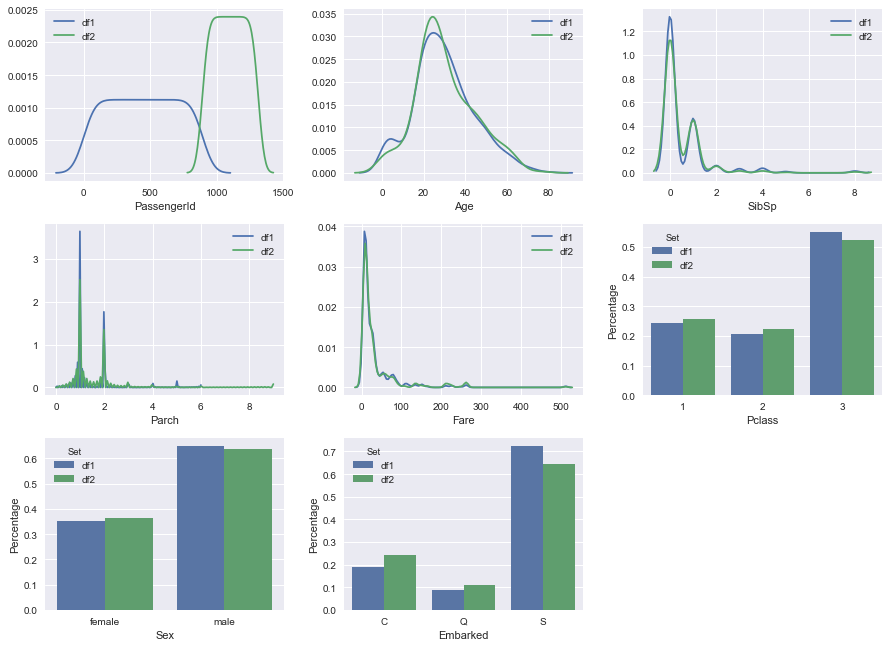

In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import itertools

def distComparison(df1, df2):
    a = len(df1.columns)
    if a%2 != 0:
        a += 1
    
    n = np.floor(np.sqrt(a)).astype(np.int64)
    
    while a%n != 0:
        n -= 1
    
    m = (a/n).astype(np.int64)
    coords = list(itertools.product(list(range(m)), list(range(n))))
    
    numerics = df1.select_dtypes(include=[np.number]).columns
    cats = df1.select_dtypes(include=['category']).columns
    
    fig = plt.figure(figsize=(15, 15))
    axes = gs.GridSpec(m, n)
    axes.update(wspace=0.25, hspace=0.25)
    
    for i in range(len(numerics)):
        x, y = coords[i]
        ax = plt.subplot(axes[x, y])
        col = numerics[i]
        sns.kdeplot(df1[col].dropna(), ax=ax, label='df1').set(xlabel=col)
        sns.kdeplot(df2[col].dropna(), ax=ax, label='df2')
        
    for i in range(0, len(cats)):
        x, y = coords[len(numerics)+i]
        ax = plt.subplot(axes[x, y])
        col = cats[i]

        df1_temp = df1[col].value_counts()
        df2_temp = df2[col].value_counts()
        df1_temp = pd.DataFrame({col: df1_temp.index, 'value': df1_temp/len(df1), 'Set': np.repeat('df1', len(df1_temp))})
        df2_temp = pd.DataFrame({col: df2_temp.index, 'value': df2_temp/len(df2), 'Set': np.repeat('df2', len(df2_temp))})

        sns.barplot(x=col, y='value', hue='Set', data=pd.concat([df1_temp, df2_temp]), ax=ax).set(ylabel='Percentage')
        
    
        
distComparison(train.drop('Survived', 1), test)

## Verifying the MCAR assumption

MCAR = missing completely at random.

In essence, if we split the data into two more sets. Data missing and Data present. Then check whether the distribution of the variables in each of these sets is the same, we can assume the data is missing completely at random.

## Deletion

## Hot Deck 

## Mean Substitution

## Regression

## Random Regression

## MICE